In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist#载入mnist数据集
from tensorflow.keras.callbacks import TensorBoard#导入tensorboard
from tensorflow.keras.models import Sequential#导入Sequential，构建神经网络
from tensorflow.keras.layers import LSTM,Dense,Dropout,Flatten
from sklearn.preprocessing import StandardScaler#导入StandardScaler进行数据预处理,归一化处理
import matplotlib.pyplot as plt

0


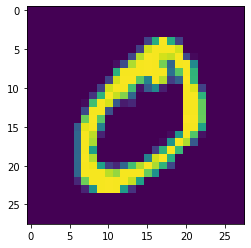

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()#数据加载,                                                    
scalar = StandardScaler()
plt.imshow(x_train[1])
print(y_train[1])



x_train表示训练数据集，y_train表示训练数据集对应的结果；x_test表示测试数据集，y_test表示测试集对应的结果

In [3]:
#对数据进行归一化处理，tf.keras.utils.normalize是L2范数下的normalize
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
print(x_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [4]:
#构建神经网络层
model = Sequential()
# model.add(Flatten())#Flatten层用来将输入“压平”，即把多维的输入一维化
model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 64s 29ms/step - loss: 0.6347 - accuracy: 0.7847
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1521 - accuracy: 0.9555
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1114 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0856 - accuracy: 0.9748
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0753 - accuracy: 0.9780


In [5]:
val_loss,val_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.0635 - accuracy: 0.9810
